In [1]:
# Some initializations
import numpy as np
import torch
import torchvision
from skimage import color
import random
import matplotlib.pyplot as plt
import sys
import os
import pprint
sys.path.append(os.path.abspath('../src/'))

import lib.utils as utils
from lib.data.worms_dataset import WormsDataset
from scripts.settings import Settings, DEFAULT_PATH

%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [6]:
sett = Settings('train_default.toml')
if not sett.PATH.EXPERIMENT_ROOT:
    sett.PATH.EXPERIMENT_ROOT = DEFAULT_PATH.EXPERIMENTS
if not sett.PATH.WORMS_DATASET:
    sett.PATH.WORMS_DATASET = DEFAULT_PATH.WORMS_DATASET
if not sett.PATH.CPM_DATASET:
    sett.PATH.CPM_DATASET = DEFAULT_PATH.CPM_DATASET

print(sett)

N_SAMPLES = 2000


[NAME]: default
[PATH]: 	
	[EXPERIMENT_ROOT]: /home/ashkan/workspace/deployed/worms_nuclei_metric_learning-deployed/experiments
	[WORMS_DATASET]: /home/ashkan/workspace/deployed/worms_nuclei_metric_learning-deployed/data/processed/worms_dataset
	[CPM_DATASET]: /home/ashkan/workspace/deployed/worms_nuclei_metric_learning-deployed/data/processed/cpm_dataset.pkl
[GENERAL]: 	
	[LOGGING]: 20
	[OVERWRITE]: False
	[DEBUG]: False
	[SEED]: 1234
[MODEL]: 	
	[MODEL_NAME]: unet
	[MODEL_PARAMS]: [4, 64, 4, 6]
	[INIT_MODEL_PATH]: None
	[INIT_MODEL_BEST]: False
	[INIT_MODEL_LAST]: False
[TRAIN]: 	
	[N_CLUSTER]: 558
	[N_STEP]: 100000
	[MODEL_CKPT_EVERY_N_STEP]: 20000
	[RUNNING_LOSS_INTERVAL]: 1000
	[BURN_IN_STEP]: 50000
	[LEARNING_RATE]: 0.001
	[WEIGHT_DECAY]: 0
	[LR_DROP_FACTOR]: 0.1
	[LR_DROP_PATIENCE]: 20
	[AUGMENTATION]: 		
		[ELASTIC]: 			
			[CONTROL_POINT_SPACING]: [10, 10, 10]
			[JITTER_SIGMA]: [1, 1, 1]
			[ROTATION_INTERVAL]: [-5, 5]
			[SUBSAMPLE]: 1
			[P]: 0.8
[DATA]: 	
	[N_WORKER]: 10


### n_consistent=2, patch=32

max:74, average:10.9945


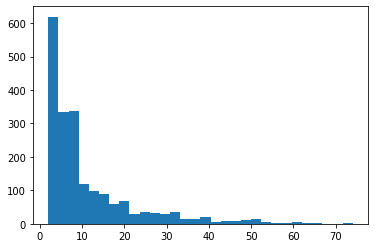

In [7]:
train_dataset = WormsDataset(
    sett.PATH.WORMS_DATASET,
    sett.PATH.CPM_DATASET,
    patch_size=sett.DATA.PATCH_SIZE,
    n_consistent_worms=sett.DATA.N_CONSISTENT_WORMS,
    use_leftout_labels=sett.DATA.USE_LEFTOUT_LABELS,
    use_coord=sett.DATA.USE_COORD,
    normalize=sett.DATA.NORMALIZE,
    augmentation=sett.TRAIN.AUGMENTATION,
    debug=True)

# train_loader = iter(train_dataset)
train_loader = iter(torch.utils.data.DataLoader(train_dataset, batch_size=None, shuffle=False, num_workers=20))

n_instance = []
for _ in range(N_SAMPLES):
    sample = next(train_loader)
    n_instance.append(sample['n_cluster'].numpy())
    
plt.hist(n_instance, bins=30)
print(f'max:{np.max(n_instance)}, average:{np.mean(n_instance)}')

### n_consistent=2, patch=64

max:166, average:35.54


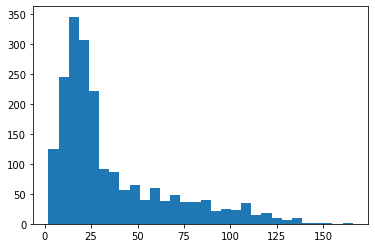

In [8]:
train_dataset = WormsDataset(
    sett.PATH.WORMS_DATASET,
    sett.PATH.CPM_DATASET,
    patch_size=[64, 64, 64],
    n_consistent_worms=sett.DATA.N_CONSISTENT_WORMS,
    use_leftout_labels=sett.DATA.USE_LEFTOUT_LABELS,
    use_coord=sett.DATA.USE_COORD,
    normalize=sett.DATA.NORMALIZE,
    augmentation=sett.TRAIN.AUGMENTATION,
    debug=True)

train_loader = iter(torch.utils.data.DataLoader(train_dataset, batch_size=None, shuffle=False, num_workers=20))

n_instance = []
for _ in range(N_SAMPLES):
    sample = next(train_loader)
    n_instance.append(sample['n_cluster'].numpy())
    
plt.hist(n_instance, bins=30)
print(f'max:{np.max(n_instance)}, average:{np.mean(n_instance)}')

### n_consistent=2, patch=128

max:287, average:94.3025


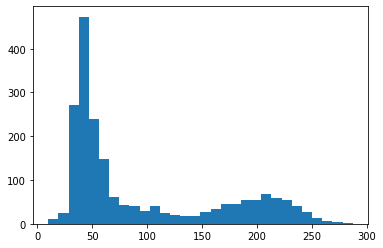

In [9]:
train_dataset = WormsDataset(
    sett.PATH.WORMS_DATASET,
    sett.PATH.CPM_DATASET,
    patch_size=[128, 128, 128],
    n_consistent_worms=sett.DATA.N_CONSISTENT_WORMS,
    use_leftout_labels=sett.DATA.USE_LEFTOUT_LABELS,
    use_coord=sett.DATA.USE_COORD,
    normalize=sett.DATA.NORMALIZE,
    augmentation=sett.TRAIN.AUGMENTATION,
    debug=True)

train_loader = iter(torch.utils.data.DataLoader(train_dataset, batch_size=None, shuffle=False, num_workers=5))

n_instance = []
for _ in range(N_SAMPLES):
    sample = next(train_loader)
    n_instance.append(sample['n_cluster'].numpy())
    
plt.hist(n_instance, bins=30)
print(f'max:{np.max(n_instance)}, average:{np.mean(n_instance)}')

### n_consistent=1, patch=32

In [ ]:
sett.DATA.N_CONSISTENT_WORMS = 1
train_dataset = WormsDataset(
    sett.PATH.WORMS_DATASET,
    sett.PATH.CPM_DATASET,
    patch_size=[32, 32, 32],
    n_consistent_worms=sett.DATA.N_CONSISTENT_WORMS,
    use_leftout_labels=sett.DATA.USE_LEFTOUT_LABELS,
    use_coord=sett.DATA.USE_COORD,
    normalize=sett.DATA.NORMALIZE,
    augmentation=sett.TRAIN.AUGMENTATION,
    debug=True)

train_loader = iter(torch.utils.data.DataLoader(train_dataset, batch_size=None, shuffle=False, num_workers=30))


n_instance = []
for _ in range(N_SAMPLES):
    sample = next(train_loader)
    n_instance.append(sample['n_cluster'].numpy())
    
plt.hist(n_instance, bins=30)
print(f'max:{np.max(n_instance)}, average:{np.mean(n_instance)}')

### n_consistent=1, patch=64

In [ ]:
train_dataset = WormsDataset(
    sett.PATH.WORMS_DATASET,
    sett.PATH.CPM_DATASET,
    patch_size=[64, 64, 64],
    n_consistent_worms=sett.DATA.N_CONSISTENT_WORMS,
    use_leftout_labels=sett.DATA.USE_LEFTOUT_LABELS,
    use_coord=sett.DATA.USE_COORD,
    normalize=sett.DATA.NORMALIZE,
    augmentation=sett.TRAIN.AUGMENTATION,
    debug=True)

train_loader = iter(torch.utils.data.DataLoader(train_dataset, batch_size=None, shuffle=False, num_workers=30))

n_instance = []
for _ in range(N_SAMPLES):
    sample = next(train_loader)
    n_instance.append(sample['n_cluster'].numpy())
    
plt.hist(n_instance, bins=30)
print(f'max:{np.max(n_instance)}, average:{np.mean(n_instance)}')

### n_consistent=1, patch=128

In [ ]:
train_dataset = WormsDataset(
    sett.PATH.WORMS_DATASET,
    sett.PATH.CPM_DATASET,
    patch_size=[128, 128, 128],
    n_consistent_worms=sett.DATA.N_CONSISTENT_WORMS,
    use_leftout_labels=sett.DATA.USE_LEFTOUT_LABELS,
    use_coord=sett.DATA.USE_COORD,
    normalize=sett.DATA.NORMALIZE,
    augmentation=sett.TRAIN.AUGMENTATION,
    debug=True)

train_loader = iter(torch.utils.data.DataLoader(train_dataset, batch_size=None, shuffle=False, num_workers=10))

n_instance = []
for _ in range(N_SAMPLES):
    sample = next(train_loader)
    n_instance.append(sample['n_cluster'].numpy())
    
plt.hist(n_instance, bins=30)
print(f'max:{np.max(n_instance)}, average:{np.mean(n_instance)}')